# Master Notebook with Combined Results

This notebook combines all relevant trial data and will apply statistical methods to the combined results. 

Currently it includes an overall $T$-$\omega_0$ plot. We are working on adding a linear model with metrics to this chart.

In [5]:
import sys
sys.path.append('..')

from analyse.prelude import *

[INFO] Processing '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01/Raw Data.csv' ...
[INFO] Processing '../data/round3/Gyroscope rotation rate 2025-02-14 09-35-02/Raw Data.csv' ...
[INFO] Processing '../data/round3/Gyroscope rotation rate 2025-02-14 10-47-18/Raw Data.csv' ...
[INFO] -> discarding segment 28
[INFO] Processing '../data/round4/Gyroscope rotation rate 2025-02-23 13-16-45/Raw Data.csv' ...
[INFO] -> discarding segment 5
[INFO] Processing '../data/round4/Gyroscope rotation rate 2025-02-23 13-28-34/Raw Data.csv' ...
[INFO] -> discarding segment 1
[INFO] -> discarding segment 2
[INFO] -> discarding segment 3
[INFO] -> discarding segment 4
[INFO] -> discarding segment 5
[INFO] -> discarding segment 6
[INFO] -> discarding segment 10
[INFO] -> discarding segment 40
[INFO] Found 113 trials in 5 files.
[WARNING] zero method returned no results
[INFO] Skipping segment 0 of '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01' ...
Results for segment 1 of ../data/ro

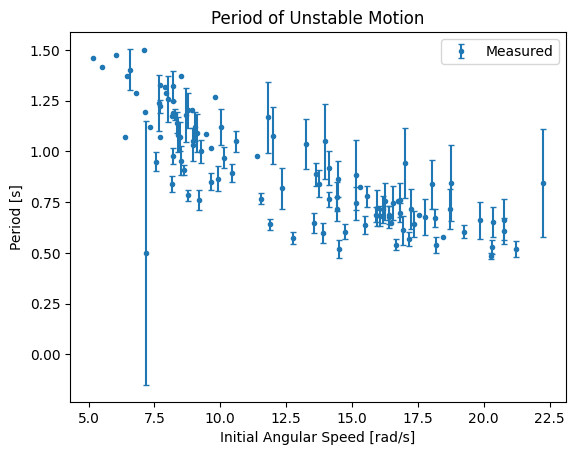

In [6]:
trials, meta = load_files(['round2', 'round3', 'round4'])

I = box_moi(*PHONE_DIMS, PHONE_MASS)

for trial in trials:
    add_angular_momentum(trial, I)

period_data = point_trial_periods(trials, meta, plot_points=False)

plot_speed_vs_period(period_data)

[INFO] Parameter #1: -3.996559e-02 ± 1.2e-03, relative error: -0.03
[INFO] Parameter #2: 1.302621e+00 ± 1.7e-02, relative error: 0.01


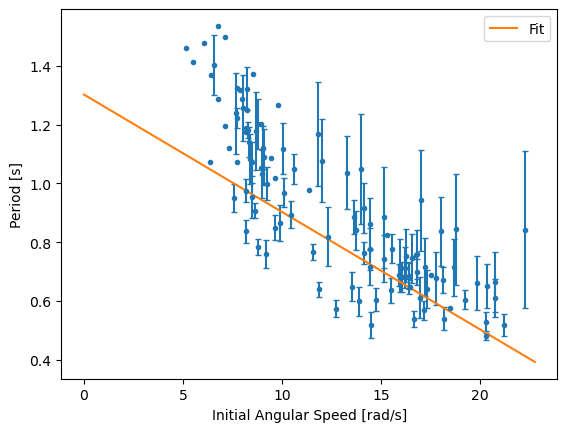

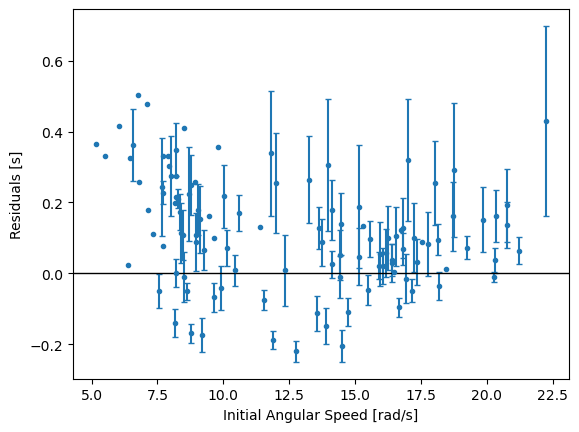

[INFO] Chi squared: 5.14


In [7]:
fit_model(period_data)